# WEEK 6 ASSIGNMENT: EXPLORING EARTHQUAKE DATA

### In this assignment, you will explore data collected on earthquakes of magnitude > 4.5 that occurred globally from 1 Feb 2021 through 1 Feb 2022 using some basic tools in Pandas!

Want to know more about earthquakes? Check out: https://www.usgs.gov/natural-hazards/earthquake-hazards/science/science-earthquakes?qt-science_center_objects=0#qt-science_center_objects 

In [1]:
# import needed modules 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### (0)  Data download time!  Let's use a cool tool:  automated download of earthquake data using an API on the USGS website

-  How did I determine how to use this API to download earthquake data for specific parameters?
   - See here for instructions + examples:
https://earthquake.usgs.gov/fdsnws/event/1/
<br><br>
- We want earthquakes:
   - anywhere on globe
   - of at least mangitude 4.5
   - from 0 UTC on February 1, 2021 to 0 UTC on February 1, 2022
   - ordered by time, with most recent first
   - downloaded as a CSV-formatted database
<br><br>
- Review the code I give you below for this and prove to yourself that all that information is woven within there!

In [2]:
# Automated way to download earthquake data!
import urllib.request # module for downloading data from URLs, may need to install
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2021-2-1&endtime=2022-2-1&minmagnitude=4.5&orderby=time'
urllib.request.urlretrieve(url,'query.csv')

('query.csv', <http.client.HTTPMessage at 0x7f514f8926d0>)

#### (1)  Read in data into a Pandas DataFrame
- don't specify an index column, allow Pandas to default to creating its own- the time strings are messy and you haven't learned yet how to deal with them!

In [7]:
raw_data = pd.read_csv('query.csv')
raw_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-31T22:18:32.343Z,-20.8636,-175.3691,10.00,4.6,mb,NaN,86.0,6.943,0.64,us,us7000ggux,2022-02-09T06:30:12.040Z,Tonga,earthquake,8.0,1.9,0.206,9.0,reviewed,us,us
1,2022-01-31T22:01:27.405Z,31.9193,104.3384,10.00,4.6,mb,NaN,69.0,4.062,0.94,us,us7000ggtq,2022-02-09T06:26:33.040Z,"39 km WNW of Jiangyou, China",earthquake,8.0,1.9,0.085,41.0,reviewed,us,us
2,2022-01-31T21:36:17.102Z,-29.8948,-71.9834,9.43,4.5,mwr,NaN,94.0,0.647,0.68,us,us7000ggt4,2022-02-09T06:24:27.040Z,"62 km W of Coquimbo, Chile",earthquake,4.4,2.1,0.039,64.0,reviewed,us,us
3,2022-01-31T20:07:12.636Z,-20.5450,-175.3251,10.00,4.7,mb,NaN,124.0,6.752,0.92,us,us7000ggus,2022-02-25T19:27:48.040Z,"67 km N of Nuku‘alofa, Tonga",earthquake,8.9,1.8,0.118,22.0,reviewed,us,us
4,2022-01-31T19:18:23.415Z,-30.0451,-177.5443,20.72,4.8,mb,NaN,188.0,0.846,0.51,us,us7000gi0f,2022-02-28T16:48:31.040Z,"Kermadec Islands, New Zealand",earthquake,5.7,5.7,0.197,8.0,reviewed,us,us


#### (2)  In doing (1) note that: we are only interested in the following variables (columns), so either only read in these variables, or read in all variables and subsequently drop the other columns, and confirm that you have done successfully 
   - time
   - latitude
   - longitude
   - depth
   - mag (magnitude of earthquake - strength)
   - place

In [8]:
# we are interested in only 'time', 'latitude', 'longitude', 'depth', 'mag', 'place' columns of query dataframe

earthquake_df = raw_data[['time','latitude','longitude','depth','mag','place']]
earthquake_df.head()   

,time,latitude,longitude,depth,mag,place
0,2022-01-31T22:18:32.343Z,-20.8636,-175.3691,10.00,4.6,Tonga
1,2022-01-31T22:01:27.405Z,31.9193,104.3384,10.00,4.6,"39 km WNW of Jiangyou, China"
2,2022-01-31T21:36:17.102Z,-29.8948,-71.9834,9.43,4.5,"62 km W of Coquimbo, Chile"
3,2022-01-31T20:07:12.636Z,-20.5450,-175.3251,10.00,4.7,"67 km N of Nuku‘alofa, Tonga"
4,2022-01-31T19:18:23.415Z,-30.0451,-177.5443,20.72,4.8,"Kermadec Islands, New Zealand"


#### (3) Print the first five and last five rows to get a sense of your data 

In [9]:
earthquake_df.head()

,time,latitude,longitude,depth,mag,place
0,2022-01-31T22:18:32.343Z,-20.8636,-175.3691,10.00,4.6,Tonga
1,2022-01-31T22:01:27.405Z,31.9193,104.3384,10.00,4.6,"39 km WNW of Jiangyou, China"
2,2022-01-31T21:36:17.102Z,-29.8948,-71.9834,9.43,4.5,"62 km W of Coquimbo, Chile"
3,2022-01-31T20:07:12.636Z,-20.5450,-175.3251,10.00,4.7,"67 km N of Nuku‘alofa, Tonga"
4,2022-01-31T19:18:23.415Z,-30.0451,-177.5443,20.72,4.8,"Kermadec Islands, New Zealand"


In [10]:
earthquake_df.tail()

,time,latitude,longitude,depth,mag,place
9120,2021-02-01T05:47:52.716Z,38.8807,25.9761,10.00,4.8,"28 km SW of Polichnítos, Greece"
9121,2021-02-01T05:46:52.958Z,38.9677,26.0599,10.00,4.8,"16 km SW of Polichnítos, Greece"
9122,2021-02-01T05:31:49.212Z,4.1646,126.5903,49.04,4.5,"185 km SE of Sarangani, Philippines"
9123,2021-02-01T05:19:59.928Z,-59.1499,-25.9477,71.80,5.1,South Sandwich Islands region
9124,2021-02-01T00:12:47.586Z,-28.9953,-177.2697,63.01,4.6,Kermadec Islands region


#### (4)  Access just the time and depth columns (for all rows), using a special Pandas indexing function 

In [11]:
# access time and depth columns of earthquake_df (for all rows) using a special pandas indexing function
time_and_depth = earthquake_df.loc[:,['time','depth']]
time_and_depth.head()

,time,depth
0,2022-01-31T22:18:32.343Z,10.00
1,2022-01-31T22:01:27.405Z,10.00
2,2022-01-31T21:36:17.102Z,9.43
3,2022-01-31T20:07:12.636Z,10.00
4,2022-01-31T19:18:23.415Z,20.72


#### (5) How many rows of observations are there in your DataFrame?

In [12]:
# total rows of observations in earthquake_df
print(f"Total rows of observations in earthquake_df: {earthquake_df.shape[0]}")

Total rows of observations in earthquake_df: 9125


#### (6)  What is the time/date of the most recent earthquake? While you could manually use the results of things you've printed earlier for this..... you MUST actually access this observation using Pandas indexing!!!

In [13]:
# What is the time/date of the most recent earthquake? 
print(f"Most recent earthquake: {earthquake_df.iloc[0, 0]}")

Most recent earthquake: 2022-01-31T22:18:32.343Z


#### (7) Are there any NaNs?  If so, properly deal with them.

In [14]:
# are there any NaN values in earthquake_df?
earthquake_df.isna().sum()
# the 'place' column has 80 null values

time          0
latitude      0
longitude     0
depth         0
mag           0
place        80
dtype: int64

In [15]:
# drop rows that have at least one NaN value and then confirm that there are no more NaN values
earthquake_df.dropna(inplace=True)
earthquake_df.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


time         0
latitude     0
longitude    0
depth        0
mag          0
place        0
dtype: int64

In [16]:
print(f"Total rows of observations in earthquake_df: {earthquake_df.shape[0]}")

Total rows of observations in earthquake_df: 9045


#### (8) Using a single function, calculate basic statistics for each column (each variable)

In [17]:
# Using a single function, calculate basic statistics for each column (each variable)
earthquake_df.describe()

,latitude,longitude,depth,mag
count,9045.000000,9045.000000,9045.000000,9045.000000
mean,-9.556005,15.370493,50.072467,4.810227
std,32.134672,127.912684,97.695201,0.369646
min,-65.436600,-179.998500,0.000000,4.500000
25%,-29.642700,-87.893700,10.000000,4.600000
50%,-14.790900,26.092400,10.000000,4.700000
75%,12.970900,134.799800,43.530000,4.900000
max,87.375200,179.996200,664.740000,8.200000


#### (9) What are the magnitudes of the seven strongest earthquakes in this dataset?

In [18]:
# use nlargest method magnitudes of the seven strongest earthquakes in earthquake_df
earthquake_df.nlargest(7,'mag')


,time,latitude,longitude,depth,mag,place
4738,2021-07-29T06:15:49.188Z,55.3635,-157.8876,35.00,8.2,"99 km SE of Perryville, Alaska"
4379,2021-08-12T18:35:17.231Z,-58.3753,-25.2637,22.79,8.1,South Sandwich Islands region
8142,2021-03-04T19:28:33.178Z,-29.7228,-177.2794,28.93,8.1,"Kermadec Islands, New Zealand"
8923,2021-02-10T13:19:55.530Z,-23.0511,171.6566,10.00,7.7,southeast of the Loyalty Islands
1589,2021-11-28T10:52:14.579Z,-4.4667,-76.8126,126.00,7.5,"43 km NNW of Barranca, Peru"
4381,2021-08-12T18:32:52.464Z,-57.5674,-25.0316,47.23,7.5,South Sandwich Islands region
8162,2021-03-04T17:41:23.370Z,-29.6768,-177.8398,43.00,7.4,"Kermadec Islands, New Zealand"


In [19]:
# print those magnitudes in a single line
print(earthquake_df.nlargest(7,'mag').iloc[:,4])

4738    8.2
4379    8.1
8142    8.1
8923    7.7
1589    7.5
4381    7.5
8162    7.4
Name: mag, dtype: float64


#### (10)  Create a scatterplot of earthquake depth vs. magnitude. 
 - remember, there is built-in Pandas plotting functionality!
 - you must include axis labels and title 
 - need units for depth? check out the metadata I linked you to above 

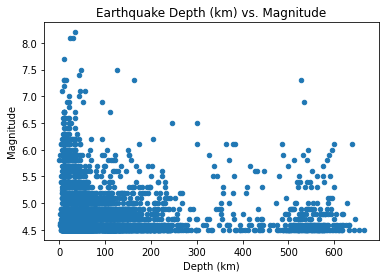

In [22]:
# scatter plot of earthquake_df's depth vs magnitude using inbuilt pandas plotting function, that has axis labels, title 
earthquake_df.plot(x='depth',y='mag',kind='scatter')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.title('Earthquake Depth (km) vs. Magnitude')
plt.show()

#### (11) Discuss, in a few sentences, any patterns you notice in your earthquake depth and magnitude scatter plot.  Please be specific.

* Most earthquakes have happened at a depth of less than 100 km, but there are some that have gone past that. 
* The earthquake of the most magnitude occured at a depth of less than 50 km.
* As you go deeper into the earth, the number of the earthquakes decreases for most cases.
* There are very few earthquakes at a depth between 300 and 400 km, as compared to the rest of the depths.
* Looking at the y-axis, we can say that the most common magnitude of the earthquake is 4.5

#### (12)  Create a histogram of earthquake depth!  First, you'll want to evaluate the range of values so that you wisely pick the number of bins you'll want. You might need to experiment with this a bit!

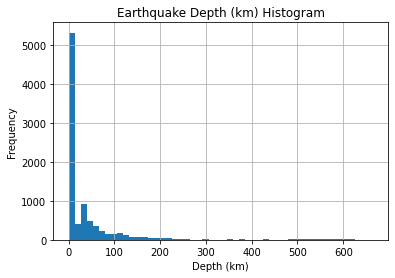

In [43]:
# create a histogram of earthquake_df's depth column using inbuilt pandas plotting function, that has axis labels, title
earthquake_df.hist(column='depth',bins=50)
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.title('Earthquake Depth (km) Histogram')
plt.show()

#### (13)  From your histogram in (12), please estimate the most common depth.

Based on the histogram, the most common depth is 10 km, having the count of almost 5000. 